In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('CustomerChurn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Senior Citizen dtype is int 
##### total charges dtype is obj, need a num dtype

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### tenure= mean 32, median 29 (almost equal, less chances of outliers), 75% fall below 55 months.
##### Monthly Charges= mean 64, median 70 (almost equal, less chances of outliers), 75% pay less than 90 USD per month which means around 1/4 pays higher than 90 USD

In [8]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
data['Churn'].value_counts()/len(data['Churn'])*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

##### We can see a very high percentage (26.5%) of people who have churned 

Text(0.5, 1.0, 'Distribution of people based on churned or not')

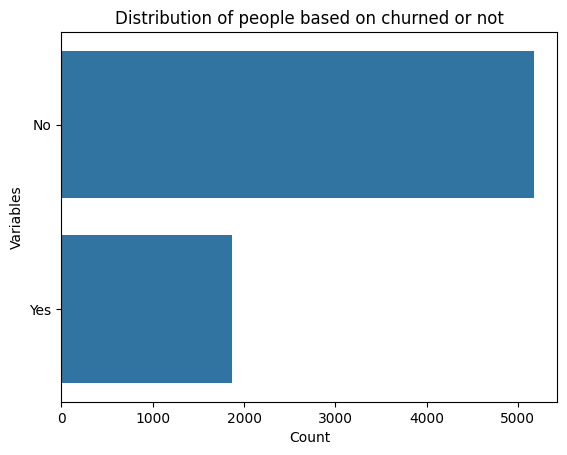

In [10]:
sns.barplot(data=data['Churn'].value_counts(), orient='h')
plt.xlabel('Count')
plt.ylabel('Variables')
plt.title('Distribution of people based on churned or not')

In [11]:
new_data=data.copy()

In [12]:
new_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
new_data.TotalCharges= pd.to_numeric(new_data.TotalCharges, errors='coerce')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
new_data[new_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
new_data[new_data['TotalCharges'].isnull()==True].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,11.0,11.0,11.000000,0.0
mean,0.0,0.0,41.418182,NaN
std,0.0,0.0,23.831484,NaN
min,0.0,0.0,19.700000,NaN
25%,0.0,0.0,20.125000,NaN
50%,0.0,0.0,25.750000,NaN
75%,0.0,0.0,58.975000,NaN
max,0.0,0.0,80.850000,NaN


In [16]:
# since there is only 11 NAN values we will remove those rows
new_data.dropna(axis= 0, inplace=True)

In [17]:
new_data['tenure'].max()

72

In [18]:
labels=["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]
labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [19]:
new_data['tenure_groups']=pd.cut(new_data.tenure, range(0,80,12), right=False, labels=labels)
new_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [20]:
new_data['tenure_groups'].value_counts()

tenure_groups
1 - 12     2058
61 - 72    1121
13 - 24    1047
25 - 36     876
49 - 60     820
37 - 48     748
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of tenure in category')

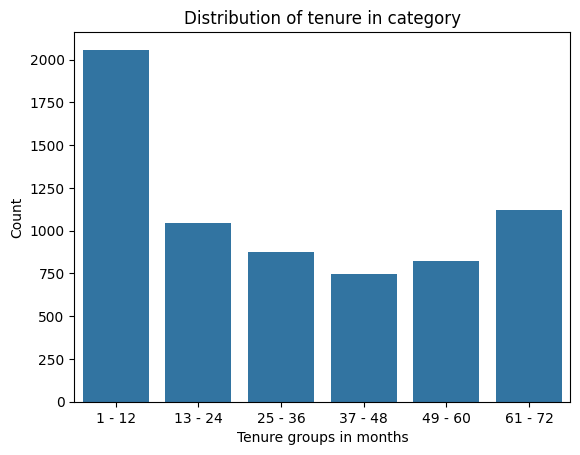

In [21]:
sns.barplot(data=new_data['tenure_groups'].value_counts())
plt.ylabel('Count')
plt.xlabel('Tenure groups in months')
plt.title('Distribution of tenure in category')

In [22]:
new_data.drop(['customerID','tenure'], axis=1, inplace=True)

In [23]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Analysis

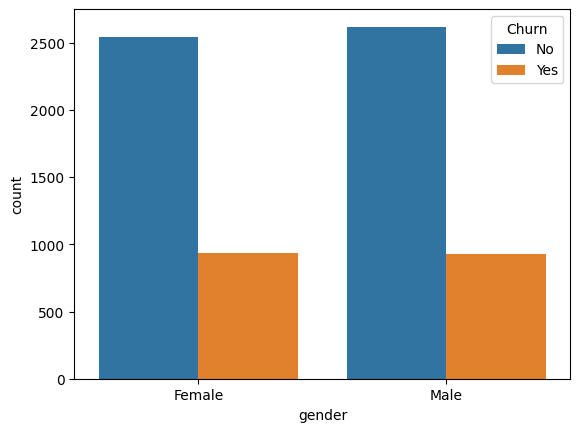

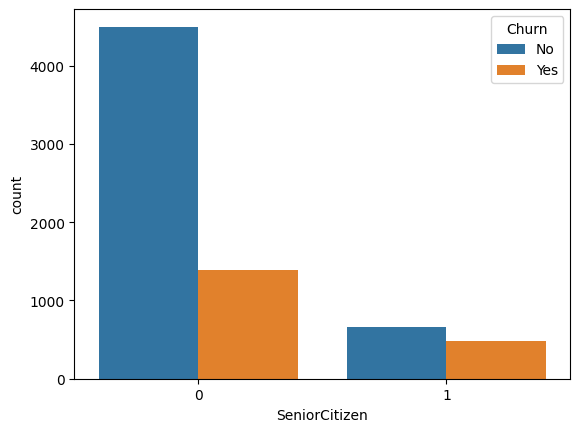

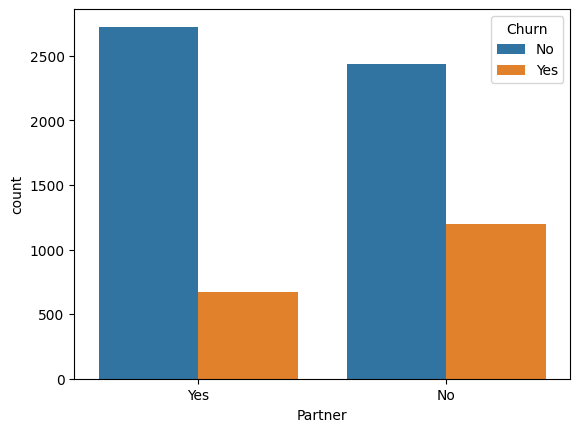

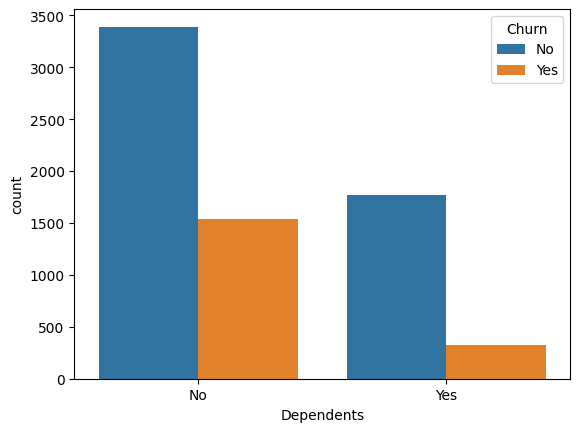

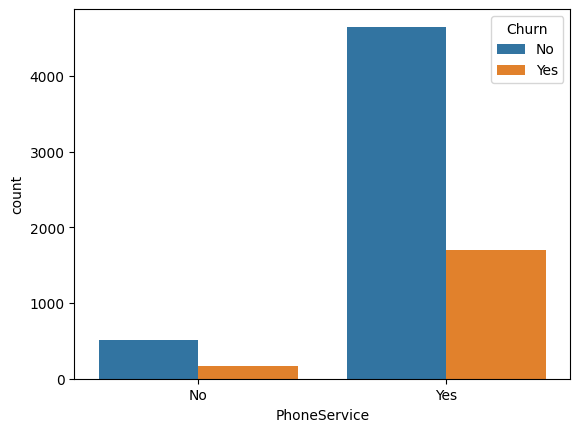

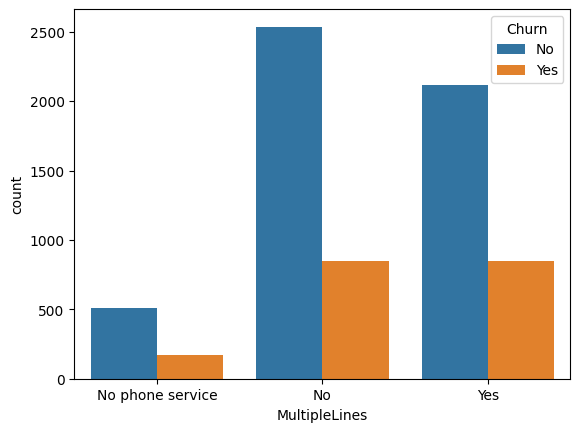

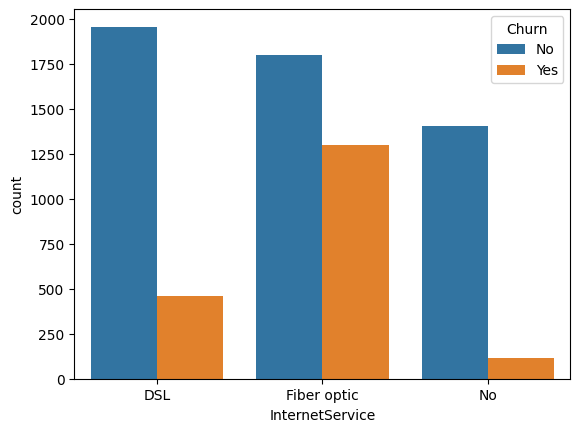

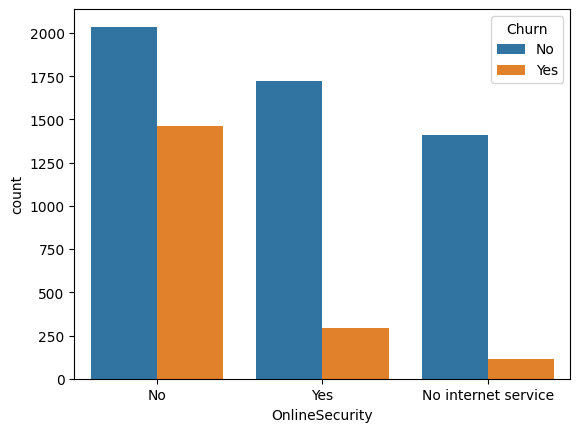

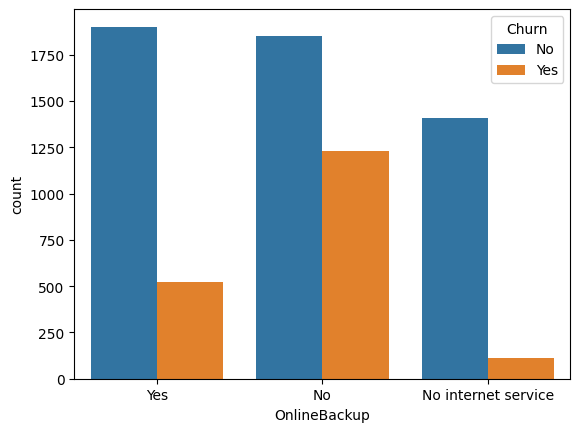

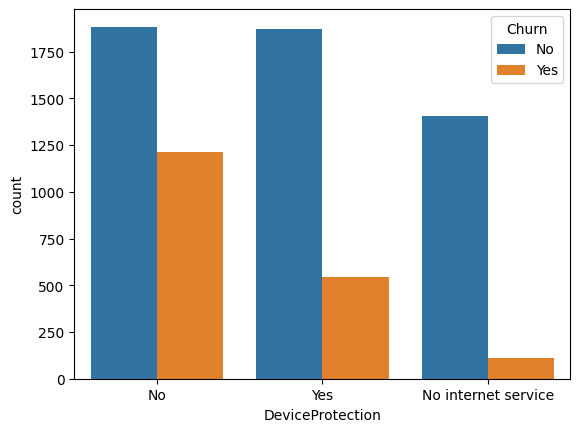

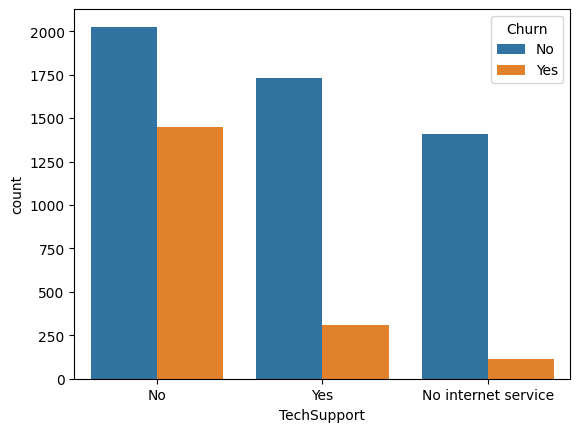

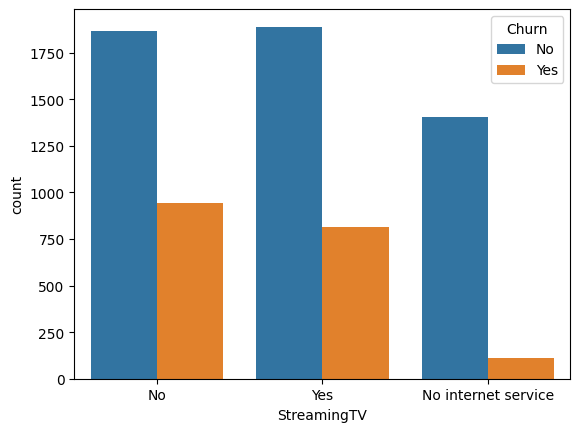

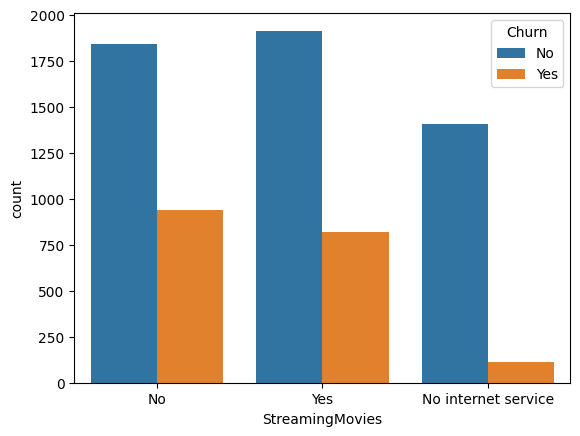

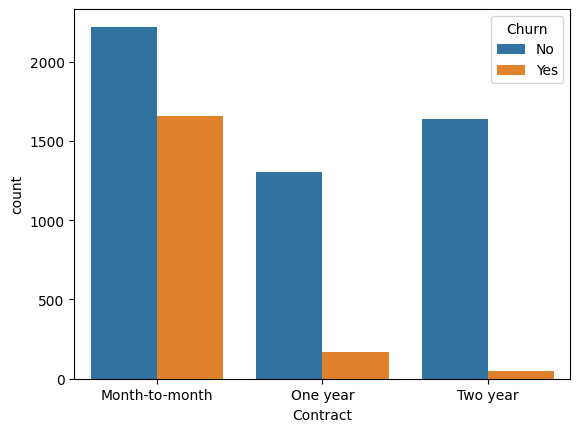

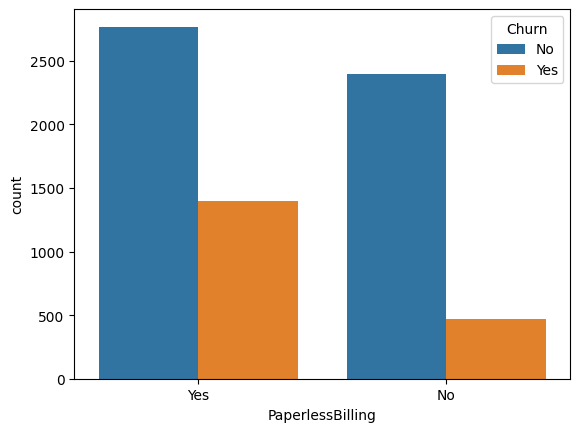

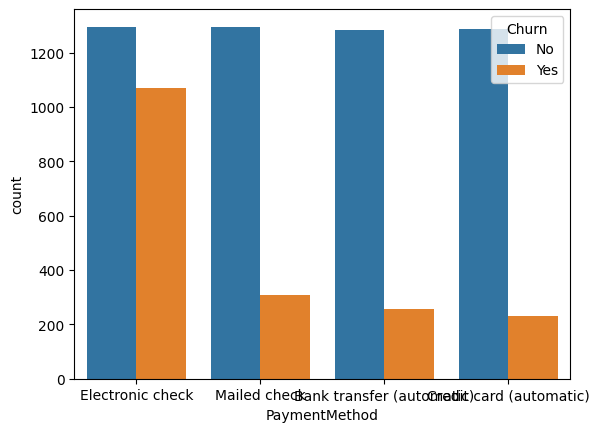

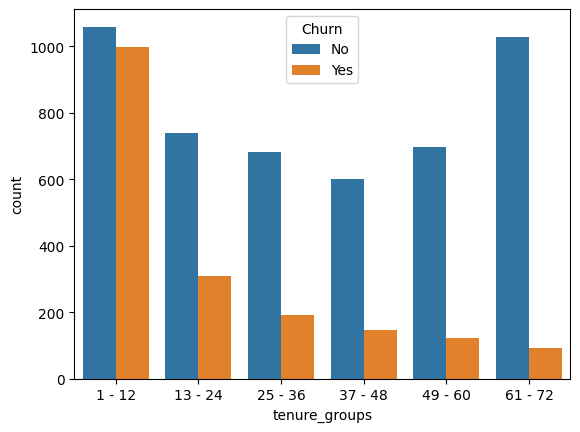

In [24]:
for i,predictor in enumerate(new_data.drop(['Churn', 'TotalCharges', 'MonthlyCharges'], axis=1)):
    plt.figure(i)
    sns.countplot(data=new_data, x=predictor, hue='Churn')

##### 1. No insight revealed from gender
##### 2. Senior citizen are more likely to churn
##### 3. People without patner are more likely to churn
##### 4. People without dependents are more likely to churn
##### 5. People using Fiber optic are more likely to churn
##### 6. People without Online Security are more likely to churn
##### 7. People without Online Backup are more likely to churn
##### 8. People without Device Protection are more likely to churn
##### 9. People without Tech support are more likely to churn
##### 10. People with montly contract are more likely to churn
##### 11. People with Paperless Billing are more likely to churn
##### 12. People with Electronic Check are more likely to churn
##### 13. People with tenure group of 1-12 are more likely to churn

In [25]:
new_data1=new_data[new_data['Churn']=='No']
new_data2=new_data[new_data['Churn']=='Yes']

In [26]:
new_data2.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [27]:
pd.crosstab(new_data['PaymentMethod'],new_data['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [28]:
new_data['Churn']=np.where(new_data['Churn']=='Yes',1,0)
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [29]:
new_data_dummies=pd.get_dummies(new_data)
new_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groups_1 - 12,tenure_groups_13 - 24,tenure_groups_25 - 36,tenure_groups_37 - 48,tenure_groups_49 - 60,tenure_groups_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


##### lets see the correlation between monthly and total charges

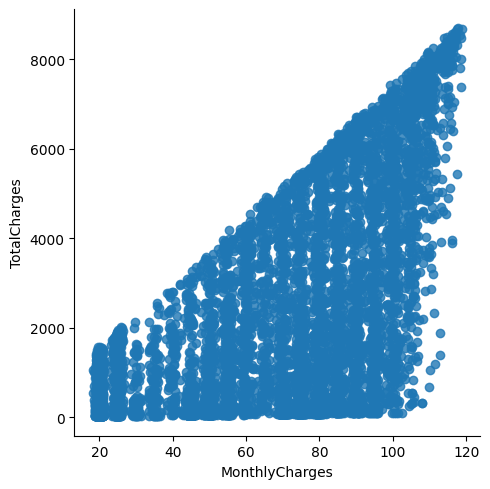

In [30]:
sns.lmplot(data=new_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [31]:
new_data_dummies['MonthlyCharges'].corr(new_data_dummies['TotalCharges'])

0.6510648032262025

##### Monthly charges increase then total charges also increase

Text(0.5, 1.0, 'Monthly charges by Churn')

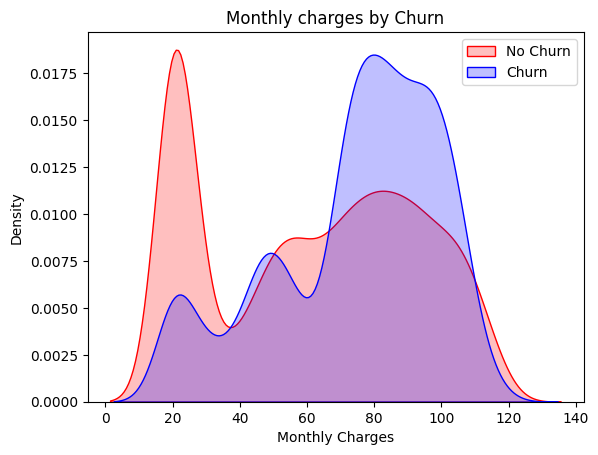

In [32]:
plt.figure()
sns.kdeplot(new_data_dummies.MonthlyCharges[(new_data['Churn']==0)],
           color='red', fill=True)
sns.kdeplot(new_data_dummies.MonthlyCharges[(new_data['Churn']==1)],
           color='blue', fill=True)
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.title('Monthly charges by Churn')

##### Churn is high when Monthly Charges are high and low when the monthly charges are low

In [33]:
new_data_dummies['MonthlyCharges'].corr(new_data_dummies['Churn'])

0.19285821847007897

Text(0.5, 1.0, 'Total charges by Churn')

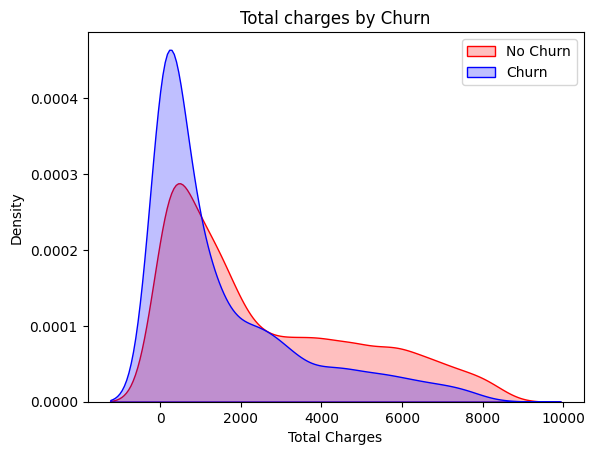

In [34]:
plt.figure()
sns.kdeplot(new_data_dummies.TotalCharges[(new_data['Churn']==0)],
           color='red', fill=True)
sns.kdeplot(new_data_dummies.TotalCharges[(new_data['Churn']==1)],
           color='blue', fill=True)
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.title('Total charges by Churn')

##### Churn is high at lower total charges
##### Higher Monthly charges with lower tenure creates lower total charges which results in higher churn

In [35]:
new_data_dummies['TotalCharges'].corr(new_data_dummies['Churn'])

-0.1994840835675645

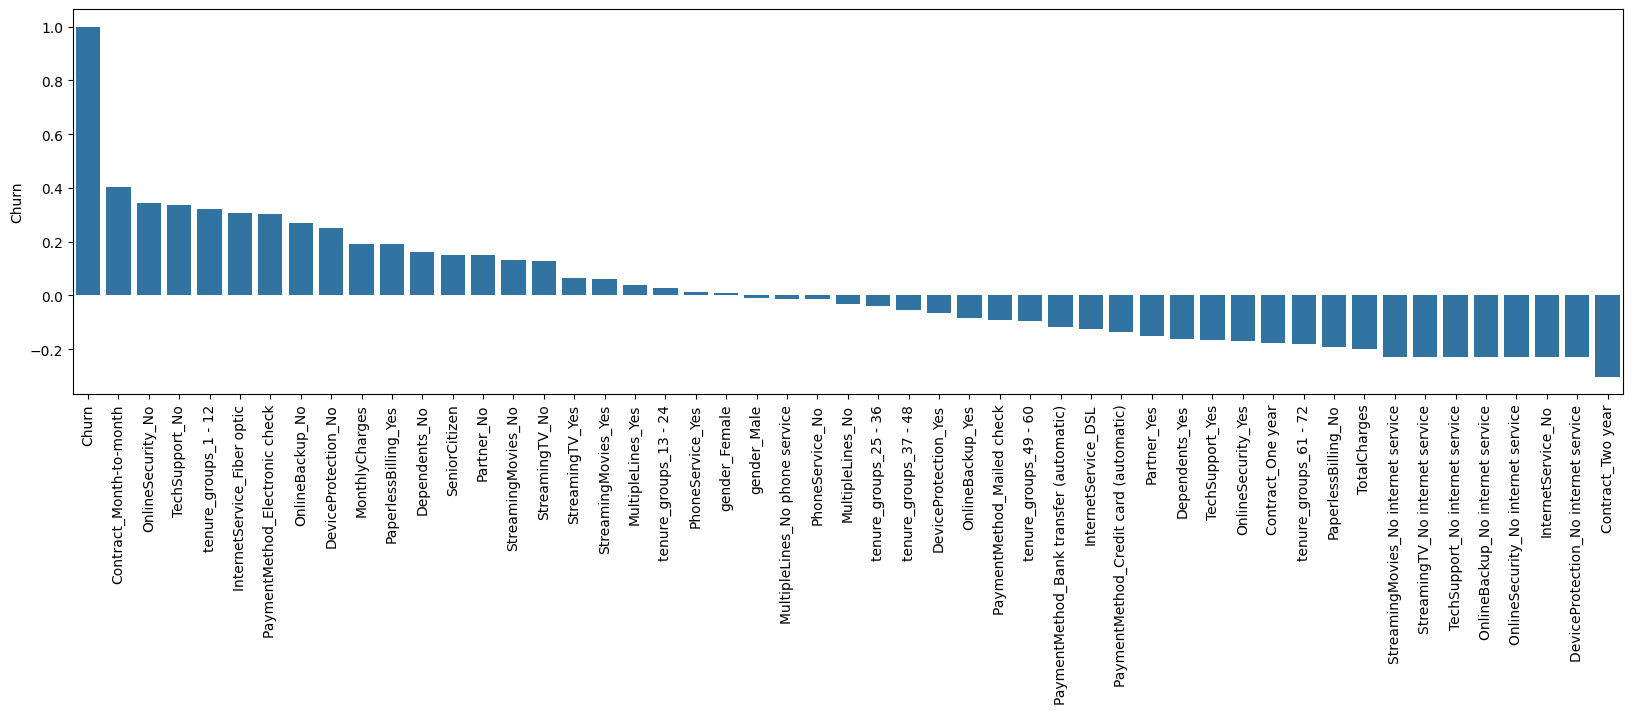

In [38]:
plt.figure(figsize=(20,5))
sns.barplot(data=new_data_dummies.corr()['Churn'].sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

<Axes: >

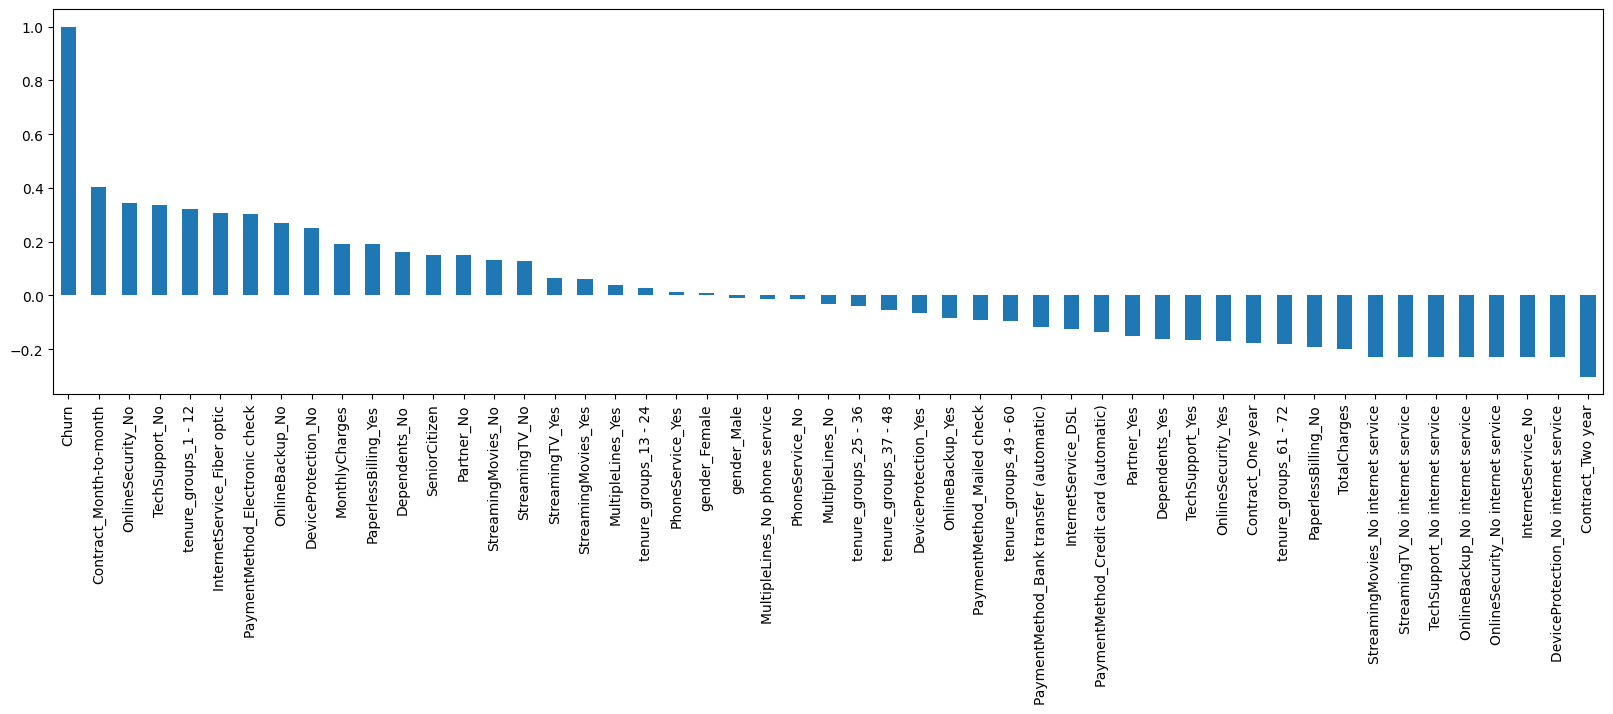

In [37]:
plt.figure(figsize=(20,5))
new_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

From the above graph we can see that **"Contract_Month to month"**, **"Online Security_no"**, **"Tech_Support_No"**, **"Tenure_Groups_1-12"**, **"Internet Service_ Fiber optics"**, **"Payment method Electronic Check"**, **"Online Booking"**, **"Device Protection_ no"** have high chances of churning.

**"Contract two year"**, **"Device protection no internet service"**, **"Internet service no"**, **"Online security no internet service"**, **"Online Backup no internet service"**, **"Techsupport no internet service"**, **"Streaming tv no internet service"**, **"Streaming movies no internet service"** have lower chances of churning.

This insight was also seen in the countplot above

<Axes: >

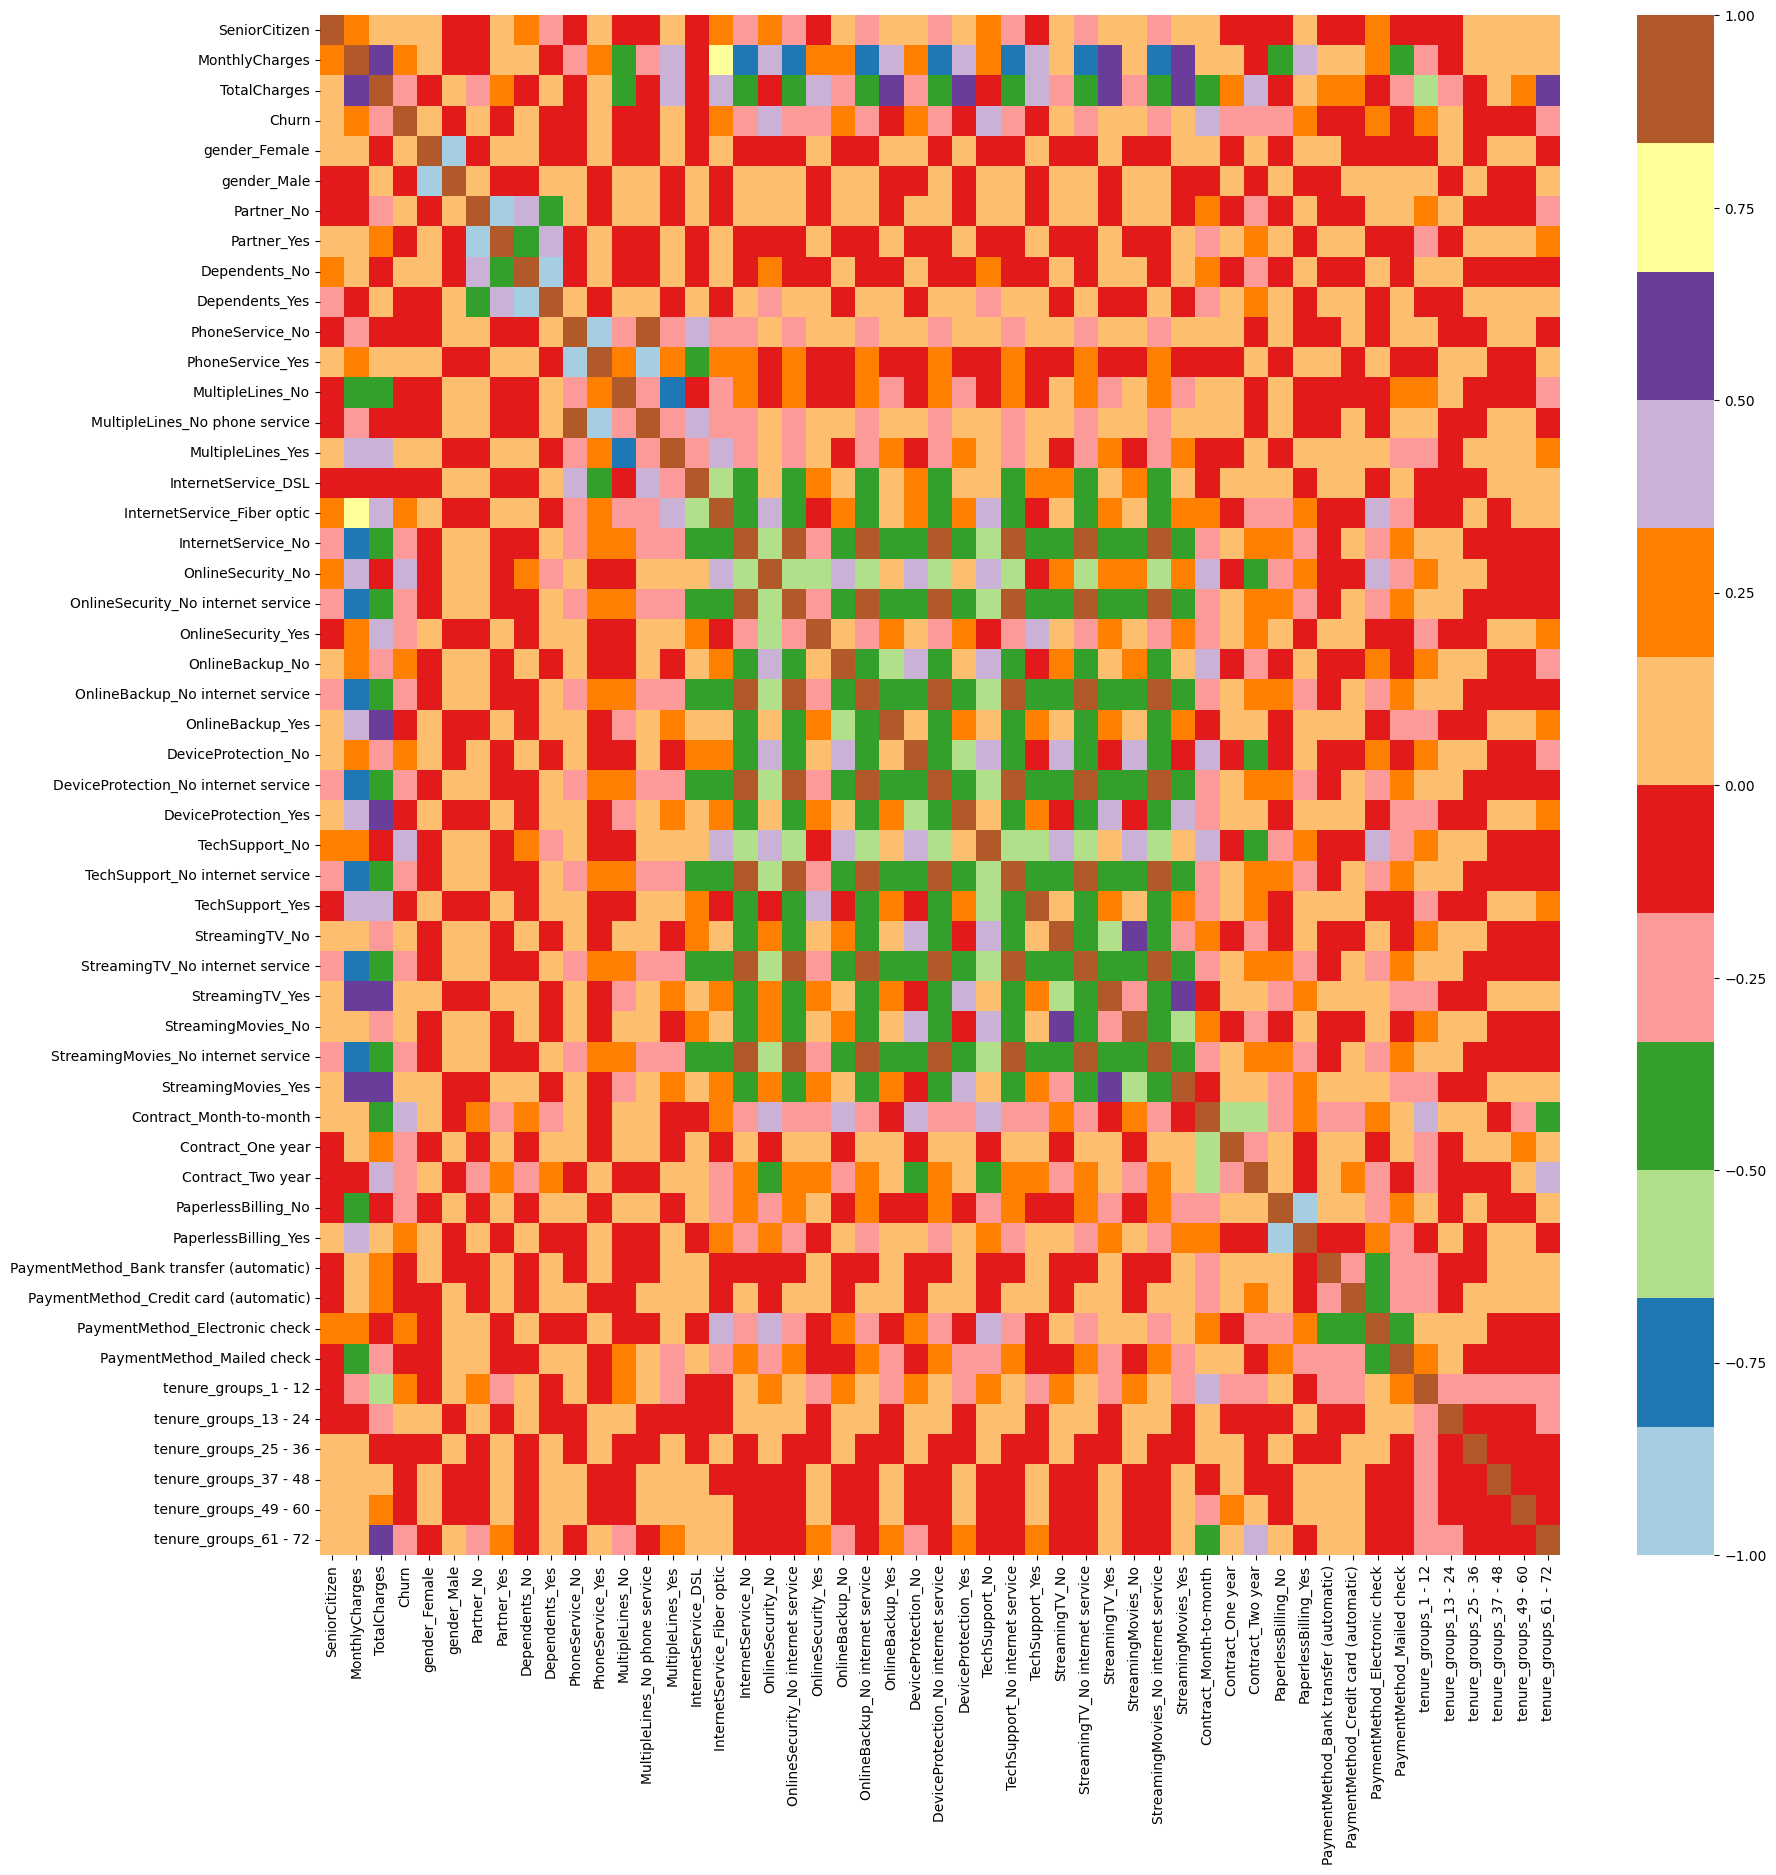

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data=new_data_dummies.corr(), cmap='Paired')

In [43]:
len(new_data2)

1869

In [45]:
new_data2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,49 - 60


Text(0, 0.5, 'log')

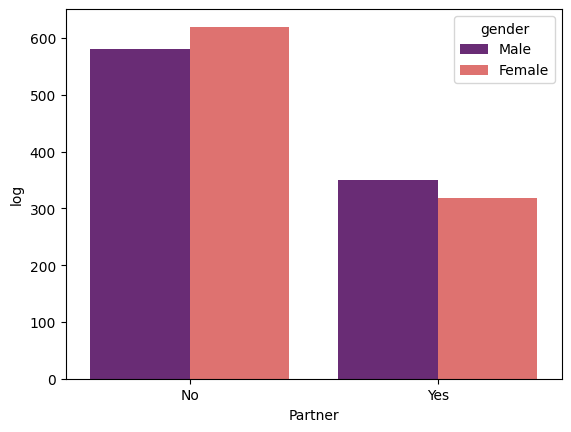

In [53]:
plt.figure()
sns.countplot(data=new_data2, x='Partner', hue='gender', palette='magma')
plt.ylabel('log')

##### Female without patner are likely to churn and male with partner are likely to churn

<Axes: xlabel='Partner', ylabel='count'>

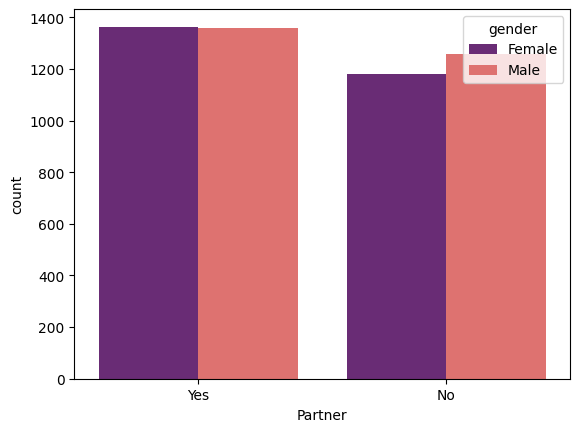

In [54]:
plt.figure()
sns.countplot(data=new_data1, x='Partner', hue='gender', palette='magma')
#plt.ylabel('log')

Text(0, 0.5, 'log')

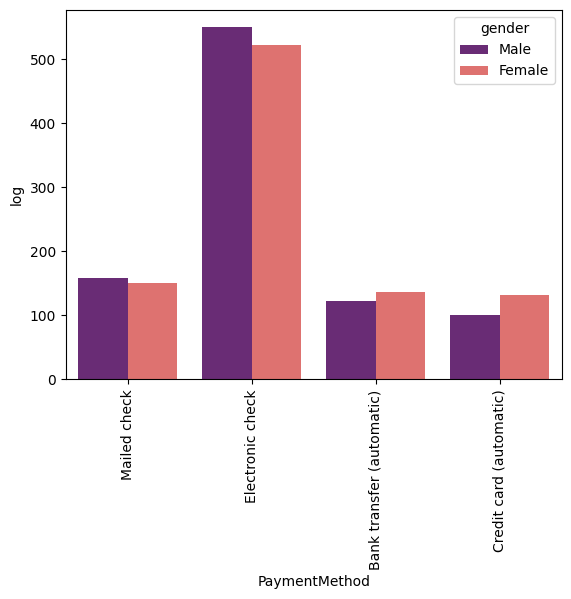

In [59]:
plt.figure()
sns.countplot(data=new_data2, x='PaymentMethod', hue='gender', palette='magma')
plt.xticks(rotation=90)
plt.ylabel('log')

##### females using credit card are more likely to churn and males using electronic check are more likely to churn

Text(0, 0.5, 'log')

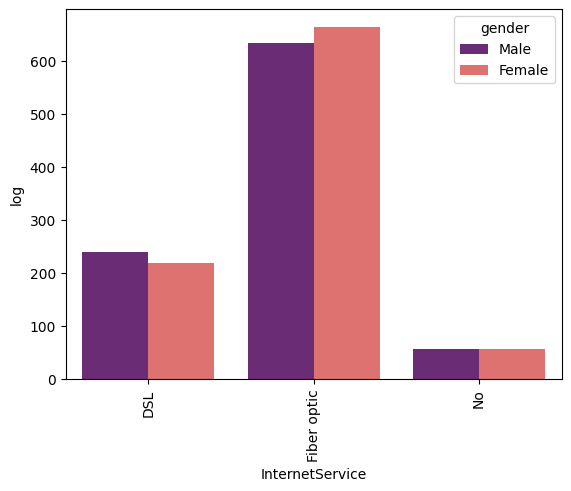

In [60]:
plt.figure()
sns.countplot(data=new_data2, x='InternetService', hue='gender', palette='magma')
plt.xticks(rotation=90)
plt.ylabel('log')

##### Females with Fiber Optics are more likely to churn

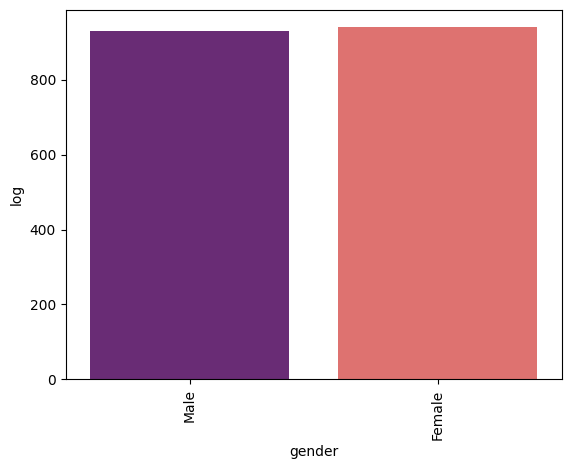

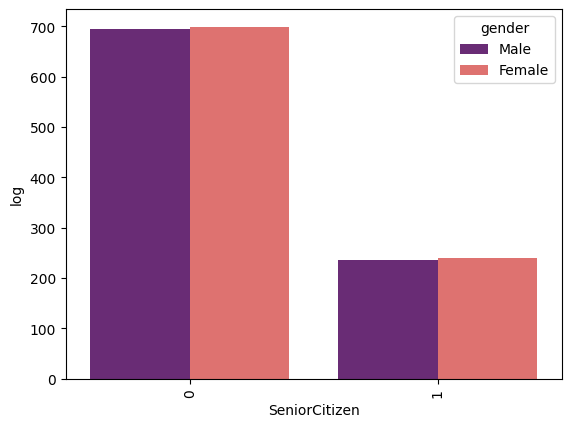

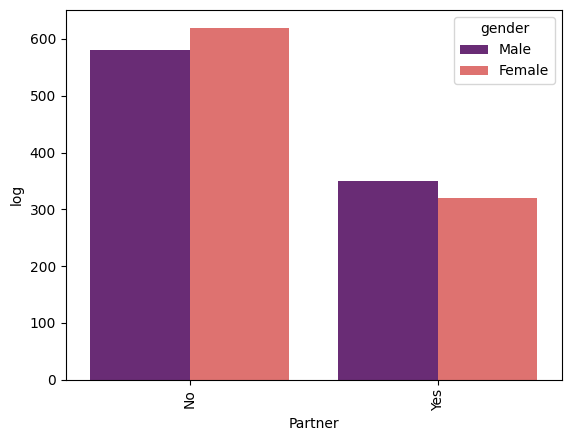

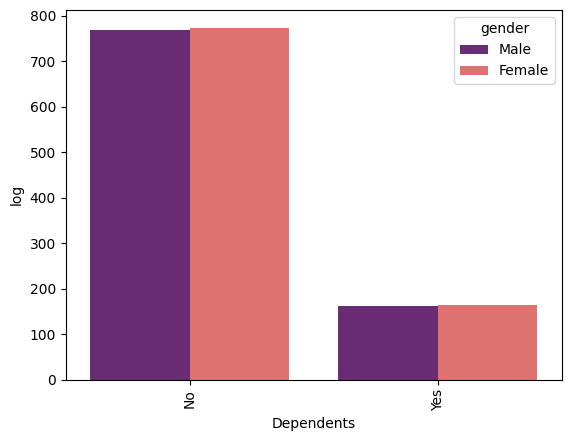

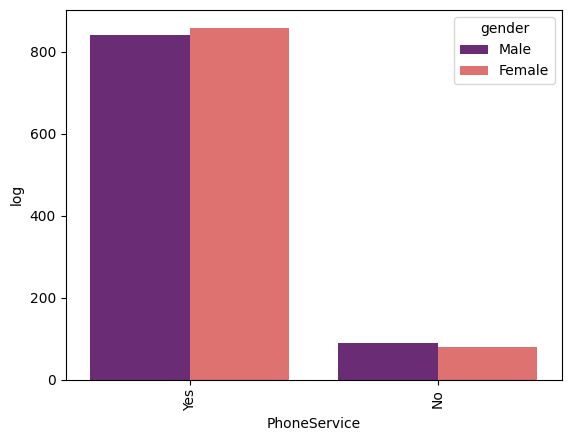

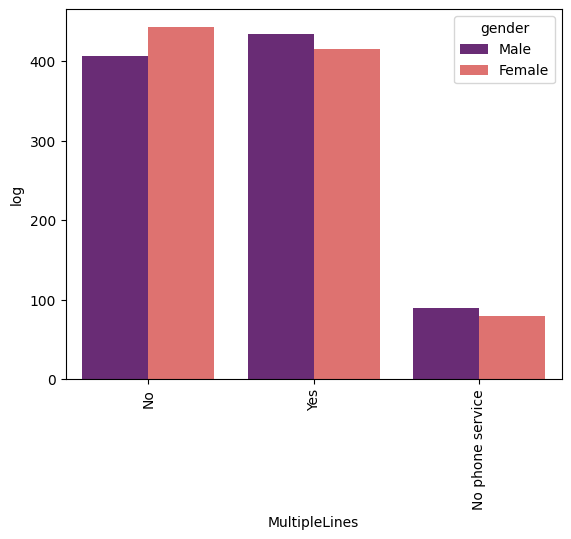

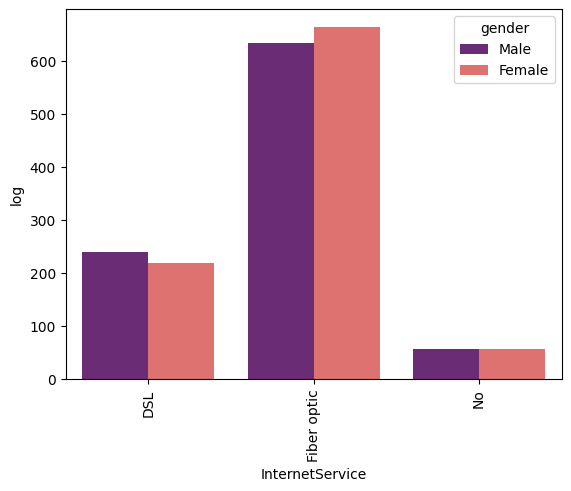

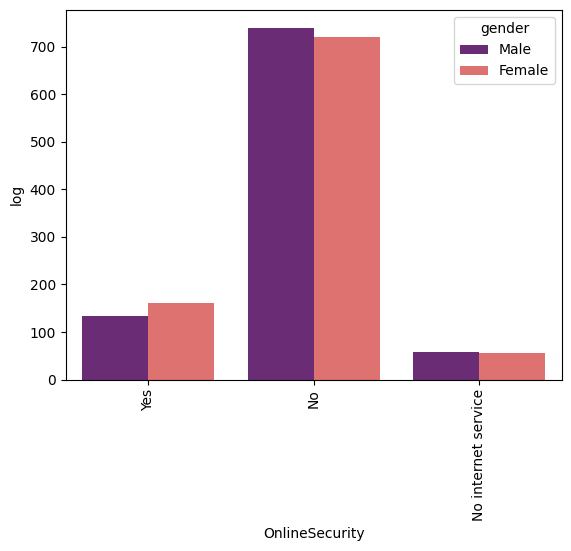

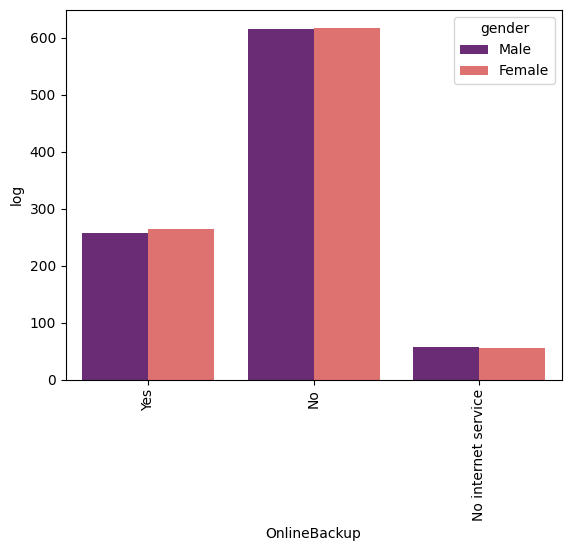

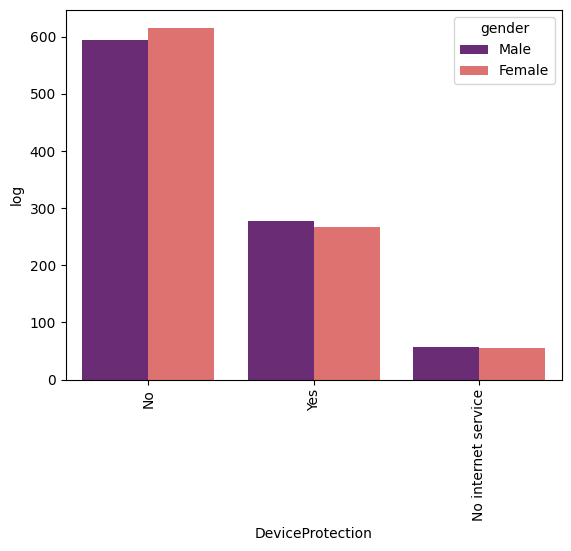

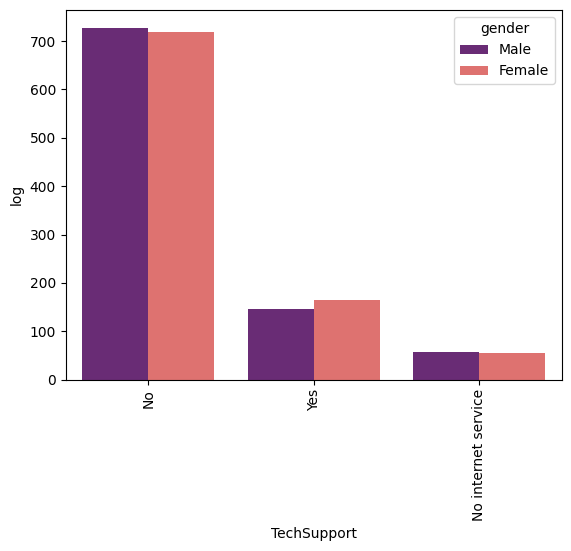

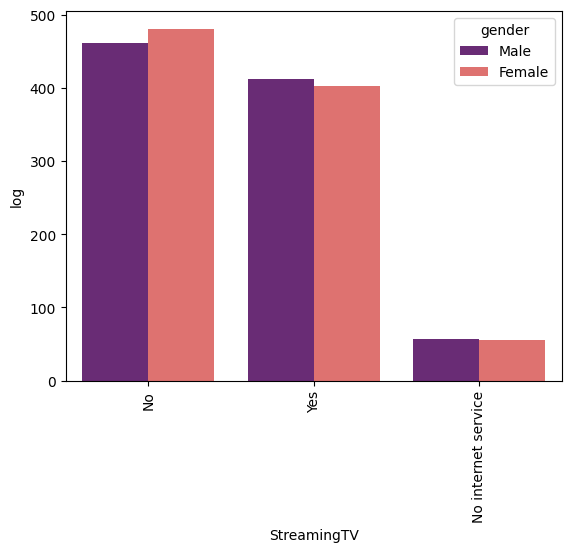

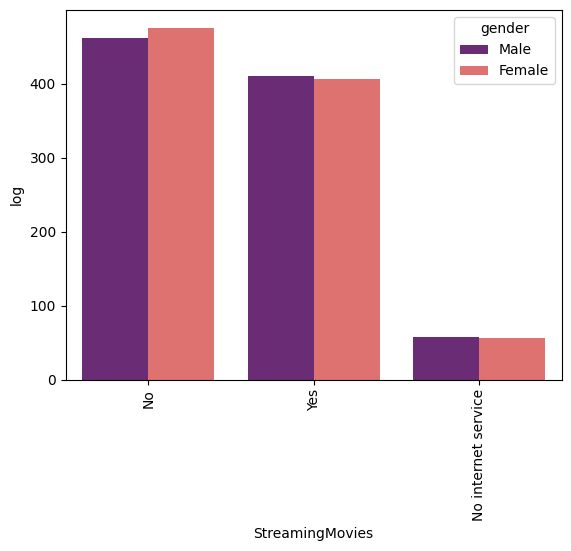

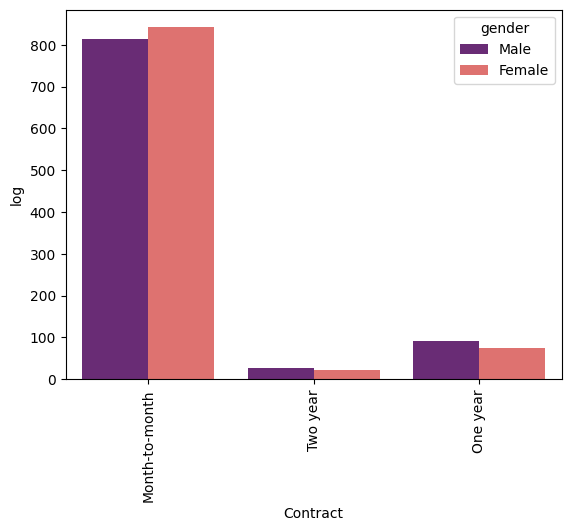

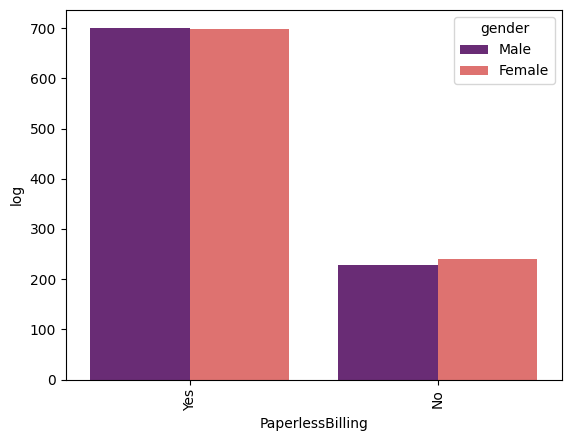

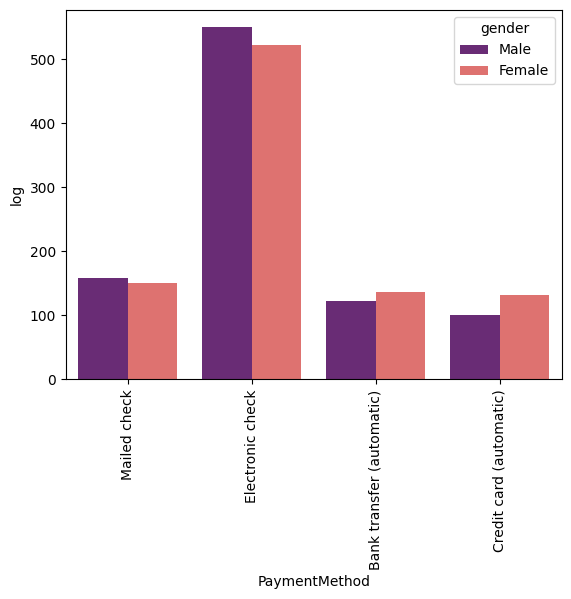

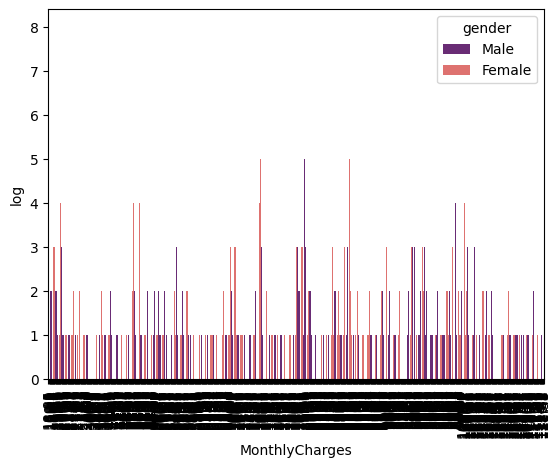

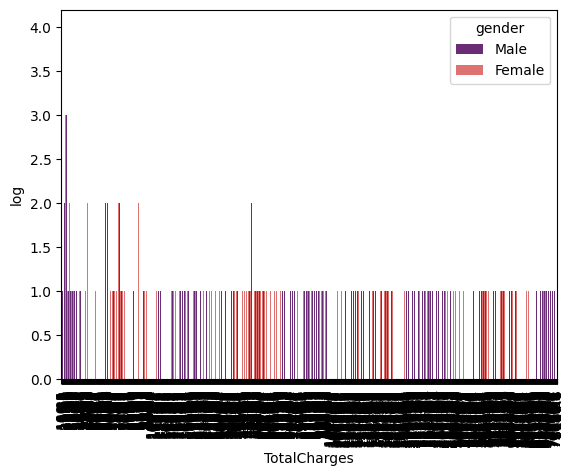

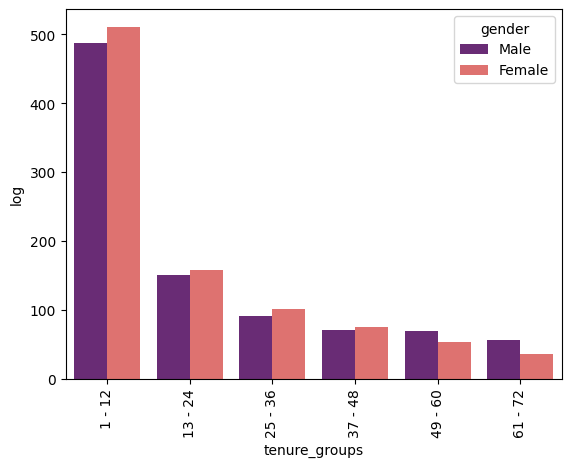

In [63]:
for i,predictor in enumerate(new_data2.drop(['Churn'], axis=1)):
    plt.figure(i)
    sns.countplot(data=new_data2, x=predictor, hue='gender', palette='magma')
    plt.xticks(rotation=90)
    plt.ylabel('log')

##### Females without multiple lines are more likely to churn
##### Females without streamingTV is more likely to churn
##### Females with tenure groups of 1-12 are more likely to churn
##### Males with tenure groups of 61-72 are more likely to churn

In [64]:
new_data2['gender'].value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [65]:
new_data1['gender'].value_counts()


gender
Male      2619
Female    2544
Name: count, dtype: int64

## Conclusion

##### 1. in categories like Fiber optics, Credit card, Multiple Line(No), StreamingTV(No), Tenure(1=12), Females are more likely to churn
##### 2. Electric check users have the highest churners
##### 3. Tenure group of 1-12 (New customers) are more likely to churn because of they are free to go customers
##### 4. No online support, tech support are high churners
##### 5. Senior citizen are less likely to churn